In [8]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [9]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze

maze = gym.make('Maze4-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()

This is how maze looks like
<class 'tuple'>
('0', '0', '1', '1', '1', '1', '0', '1')

■ ■ ■ ■ ■ ■ ■ ■
■ □ □ ■ □ □ $ ■
■ ■ □ □ ■ □ □ ■
■ ■ □ ■ □ □ ■ ■
■ □ □ □ □ □ □ ■
■ ■ □ ■ □ □ □ ■
■ □ □ □ A ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■


In [10]:
from lcs.agents.xcs import XCS, Configuration


def xcs_maze_knowledge(population, environment) -> float:
    transitions = environment.env.get_all_possible_transitions()
    nr_correct = 0
    for start, action, end in transitions:
        perception = environment.env.maze.perception(*start)
        if any([True for cl in population
                if cl.does_match(perception) and
                cl.action == action and
                cl.fitness > 0.05 and cl.experience > 10
               ]):
            nr_correct += 1
    return nr_correct / len(transitions)

def xcs_maze_metrics(xcs: XCS, environment):
    return {
        'numerosity': xcs.population.numerosity,
        'knowledge': xcs_maze_knowledge(xcs.population, environment),
        'population': len(xcs.population)
    }


cfg = Configuration(number_of_actions=8,
                    max_population=500,
                    metrics_trial_frequency=50,
                    covering_wildcard_chance = 0.9,
                    user_metrics_collector_fcn=xcs_maze_metrics)

agent = XCS(cfg)
explore_population, explore_metrics = agent.explore(maze, 1000, False)

for cl in explore_population:
    print(str(cl))




INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': [8.039796874445858e-41, 1.0271010081914198e-40, 2.7896021546162344e-40, 2.1628726839618715e-40, 2.2134950655073158e-40, 2.471568403723658e-40, 2.2244728086981627e-40, 3.0276947784829884e-41], 'numerosity': 100, 'knowledge': 0.0, 'population': 84}
INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 50, 'reward': [23.63163340933673, 18.430455608920486, 56.38092195243341, 16.425549858716614, 23.73564728004634, 17.183310941837078, 24.86147418027523, 23.077614432731824], 'numerosity': 406, 'knowledge': 0.17391304347826086, 'population': 196}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 9, 'reward': [352.73766963232856, 19.166900575348567, 97.9006631251487, 21.806666845387976, 22.967281772722767, 19.292851249260018, 21.814304301935824, 17.993674262769357], 'numerosity': 418, 'knowledge': 0.19130434782608696, 'population': 196}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 3, 'reward': [19.332357571600067

Cond:11110000 - Act:0 - Num:3 [fit: 0.000, exp: 617.00, pred: 110.518]
Cond:11110000 - Act:1 - Num:3 [fit: 0.000, exp: 258.00, pred: 111.042]
Cond:11110000 - Act:2 - Num:3 [fit: 0.000, exp: 677.00, pred: 126.120]
Cond:11110#00 - Act:3 - Num:3 [fit: 0.000, exp: 174.00, pred: 106.789]
Cond:11110#00 - Act:4 - Num:3 [fit: 0.000, exp: 205.00, pred: 115.586]
Cond:11110#00 - Act:5 - Num:3 [fit: 0.002, exp: 285.00, pred: 122.718]
Cond:11110000 - Act:6 - Num:3 [fit: 0.000, exp: 174.00, pred: 121.516]
Cond:1#110000 - Act:7 - Num:3 [fit: 0.016, exp: 206.00, pred: 155.581]
Cond:01#101#0 - Act:0 - Num:3 [fit: 0.000, exp: 628.00, pred: 208.289]
Cond:0111010# - Act:1 - Num:3 [fit: 0.000, exp: 158.00, pred: 129.247]
Cond:01#10100 - Act:2 - Num:3 [fit: 0.000, exp: 522.00, pred: 156.689]
Cond:011#0100 - Act:3 - Num:3 [fit: 0.000, exp: 125.00, pred: 107.524]
Cond:01#10100 - Act:4 - Num:3 [fit: 0.008, exp: 165.00, pred: 103.920]
Cond:011#0100 - Act:5 - Num:3 [fit: 0.000, exp: 131.00, pred: 105.505]
Cond:0

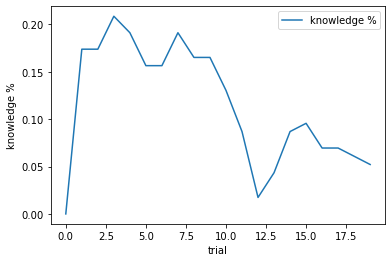

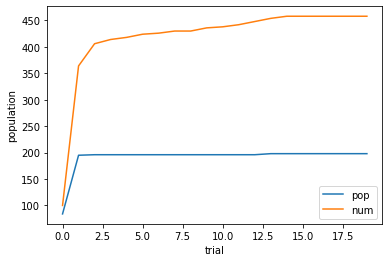

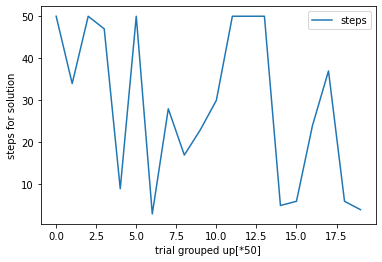

In [11]:
import pandas as pd
import numpy as np

df = pd.DataFrame(metric["knowledge"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("knowledge %")
ax.legend(["knowledge %"])


df = pd.DataFrame(zip([metric["population"] for metric in explore_metrics], [metric["numerosity"] for metric in explore_metrics]))
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["pop", "num"])

steps_averaged = []



xf = [metric["steps_in_trial"] for metric in explore_metrics]
temp_df = np.array_split(xf, 20)
for i in range(len(temp_df)):
    temp_df[i] = np.mean(temp_df[i]) 
df = pd.DataFrame(temp_df)
# df = pd.DataFrame(metric["steps_in_trial"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial grouped up[*50]")
ax.set_ylabel("steps for solution")
ax.legend(["steps"])


In [12]:
# It is hard to say but
# looking at amount of times algorithm reaches top steps (50) the steps might actually go down over trials.
# I need to somehow smooth it to see it better
